# Trích xuất đặc trưng dựa trên Word2vec

In [1]:
import pandas as pd


## 1. Tải dữ liệu đã tiền xử lý 

In [2]:
#loading the phishing URLs data to dataframe
data0 = pd.read_csv('/Users/HP/projectML/email_pre_processed.csv')
data0.head()

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new home made easy im wan...,1
3,subject color printing special request additio...,1
4,subject money get software cd software compati...,1


# 2. Sử dụng Word2vec

## 2.1 Tokenizing 

Chia văn bản thành các đơn vị (từ) riêng lẻ là các tokens. Những tokens này sau đó được chuyển đổi vào các vector để biểu diễn văn bản.


In [3]:
x_tokenized = [[w for w in sentence.split(" ") if w != ""] for sentence in data0['text']]
x_tokenized[0]

['subject',
 'naturally',
 'irresistible',
 'corporate',
 'identity',
 'lt',
 'really',
 'hard',
 'recollect',
 'company',
 'market',
 'full',
 'suqgestions',
 'information',
 'isoverwhelminq',
 'good',
 'catchy',
 'logo',
 'stylish',
 'statlonery',
 'outstanding',
 'website',
 'make',
 'task',
 'much',
 'easier',
 'promise',
 'havinq',
 'ordered',
 'iogo',
 'company',
 'automaticaily',
 'become',
 'world',
 'ieader',
 'isguite',
 'ciear',
 'without',
 'good',
 'product',
 'effective',
 'business',
 'organization',
 'practicable',
 'aim',
 'hotat',
 'nowadays',
 'market',
 'promise',
 'marketing',
 'effort',
 'become',
 'much',
 'effective',
 'list',
 'clear',
 'benefit',
 'creativeness',
 'hand',
 'made',
 'original',
 'logo',
 'specially',
 'done',
 'reflect',
 'distinctive',
 'company',
 'image',
 'convenience',
 'logo',
 'stationery',
 'provided',
 'format',
 'easy',
 'use',
 'content',
 'management',
 'system',
 'letsyou',
 'change',
 'website',
 'content',
 'even',
 'structure',


## 2.2 Khởi tạo model Word2vec

Để mang lại ý nghĩa cho các tokens, một mô hình học sâu mà nhóm sử dụng là Continuous Bag of Words được huấn luyện trên các vectơ từ tạo bởi các tokens. Điều này cho phép mô hình hiểu nghĩa của các từ và cách chúng liên quan với nhau về ngữ nghĩa.

Một vectơ từ có thể được coi là một điểm trong không gian nhiều chiều, trong đó mỗi chiều đại diện cho một khía cạnh hoặc đặc điểm của từ. Ví dụ như từ "yêu" sẽ có giá trị lớn trong chiều tạo bởi token "thích" hay "thương" và có giá trị thấp trong "ghét". Tổng hợp các chiều trên cho ta một vector từ "yêu".

Quá trình huấn luyện mô hình dựa trên các xác suất có điều kiện, nó có thể được xem như dự đoán một số từ bằng cách sử dụng một số từ xung quanh chúng trong tập văn bản.

Ta có input là một hoặc nhiều One-hot vector của các từ ngữ cảnh có chiều dài V (với V là độ lớn của từ điển), output sẽ là một vector xác suất cũng với chiều dài V của từ liên quan hoặc còn thiếu, Hidden Layer có chiều dài N, N cũng chính là độ lớn của vector từ biểu thị. 
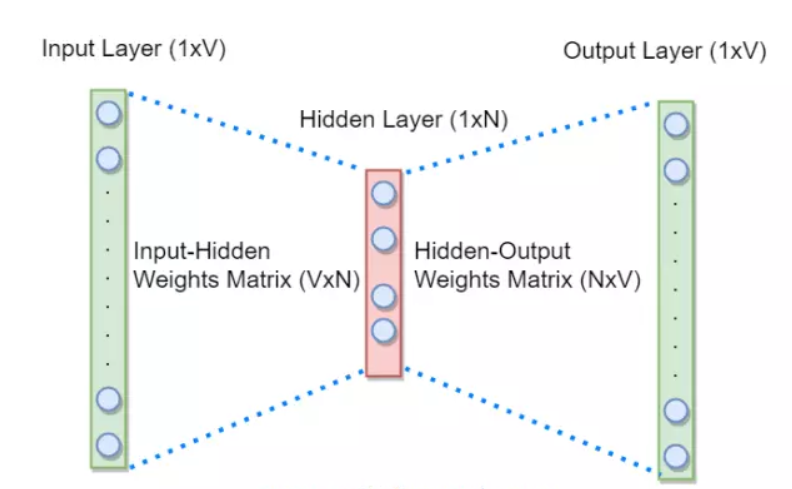
Với bộ dữ liệu dùng để train, Input sẽ bao gồm các bộ One-hot vectors ngữ cảnh và các One-hot vectors của từ mong muốn.

Về cách thức hoạt động, ban đầu hai ma trận trọng số Input-Hidden Weights Matrix và Hidden-Output Weights Matrix được khởi tạo ngẫu nhiên, Input sẽ được nhân với Input-Hidden Weights Matrix ra được một kết quả gọi là Hidden Activation, kết quả này sẽ được nhân tiếp với Hidden-Output Weights Matrix và cuối cùng được đưa vào một hàm softmax để ra được Output là 1 vector xác suất, Output này sẽ được so sánh với Output mong muốn và tính toán độ lỗi, dựa vào độ lỗi này mà mạng neuron sẽ lan truyền ngược trở lại để cập nhật các giá trị của các ma trận trọng số. Đối với mô hình CBOW nhiều Input, các thức hoạt động là tương tự, chỉ khác ở chỗ các kết quả thu được khi nhân các Input với Input-Hidden Weights Matrix sẽ được lấy trung bình để ra được Hidden Activation cuối cùng. Các trọng số của Hidden-Output Weights Matrix sau khi học xong sẽ được lấy làm biểu diễn của các vector từ. 

In [34]:
import gensim
from gensim.models import Word2Vec


model = gensim.models.Word2Vec(x_tokenized,
                 vector_size=100
                 # Size is the length of our vector.
                )



In [35]:
model.wv.most_similar("free")

[('secure', 0.7830626368522644),
 ('ad', 0.7568588852882385),
 ('feel', 0.7416977286338806),
 ('quote', 0.7358649969100952),
 ('downloads', 0.7191898822784424),
 ('online', 0.7168831825256348),
 ('anywhere', 0.6862483620643616),
 ('classified', 0.6829990148544312),
 ('otherwise', 0.6825507879257202),
 ('risknews', 0.6783303022384644)]

## 2.3 Lớp tạo chuỗi word embedding

Trong NLP, embedding (nhúng) đề cập đến sự ánh xạ dữ liệu không được vector hóa như tokens (từ vector ít chiều sang vector nhiều chiều), vào một không gian vector có ý nghĩa đối với mô hình máy học hoặc mạng nơ-ron. Từ đó, mô hình có thể tự động tìm hiểu mối quan hệ giữa các từ và nghĩa của chúng.

In [6]:
class Sequencer():
    
    def __init__(self,
                 all_words,
                 max_words,
                 seq_len,
                 embedding_matrix
                ):
        
        self.seq_len = seq_len
        self.embed_matrix = embedding_matrix
        """
        temp_vocab = Vocab which has all the unique words
        self.vocab = Our last vocab which has only most used N words.
    
        """
        temp_vocab = list(set(all_words))
        self.vocab = []
        self.word_cnts = {}
        """
        Now we'll create a hash map (dict) which includes words and their occurencies
        """
        for word in temp_vocab:
            # 0 does not have a meaning, you can add the word to the list
            # or something different.
            count = len([0 for w in all_words if w == word])
            self.word_cnts[word] = count
            counts = list(self.word_cnts.values())
            indexes = list(range(len(counts)))
        
        # Now we'll sort counts and while sorting them also will sort indexes.
        # We'll use those indexes to find most used N word.
        cnt = 0
        while cnt + 1 != len(counts):
            cnt = 0
            for i in range(len(counts)-1):
                if counts[i] < counts[i+1]:
                    counts[i+1],counts[i] = counts[i],counts[i+1]
                    indexes[i],indexes[i+1] = indexes[i+1],indexes[i]
                else:
                    cnt += 1
        
        for ind in indexes[:max_words]:
            self.vocab.append(temp_vocab[ind])
                    
    def textToVector(self,text):
        # First we need to split the text into its tokens and learn the length
        # If length is shorter than the max len we'll add some spaces (100D vectors which has only zero values)
        # If it's longer than the max len we'll trim from the end.
        tokens = text.split()
        len_v = len(tokens)-1 if len(tokens) < self.seq_len else self.seq_len-1
        vec = []
        for tok in tokens[:len_v]:
            try:
                vec.append(self.embed_matrix[tok])
            except Exception as E:
                pass
        
        last_pieces = self.seq_len - len(vec)
        for i in range(last_pieces):
            vec.append(np.zeros(100,))
        
        return np.asarray(vec).flatten()


Điều này có nghĩa là Hidden Layer của CBOW thực sự chỉ hoạt động như một bảng tra cứu. Đầu ra của Hidden Layer là vector từ cho từ đầu vào. 

In [7]:
sequencer = Sequencer(all_words = [token for seq in x_tokenized for token in seq],
              max_words = 1200,
              seq_len = 14,
              embedding_matrix = model.wv
             )

In [167]:
import numpy as np
test_vec = sequencer.textToVector("i am in love with you hihi")
test_vec

array([0.14387274, 0.19471148, 0.14099523, ..., 0.        , 0.        ,
       0.        ])

In [10]:
# But before creating a PCA model using scikit-learn let's create
# vectors for our each vector
x_vecs = np.asarray([sequencer.textToVector(" ".join(seq)) for seq in x_tokenized])
print(x_vecs.shape)

(5728, 1400)


## 2.4 Giảm chiều vector sử dụng PCA  

In [195]:
from sklearn.decomposition import PCA
#pca_model = PCA(n_components=300)
pca_model = PCA()
pca_model.fit(x_vecs)
print("Sum of variance ratios: ",sum(pca_model.explained_variance_ratio_))

Sum of variance ratios:  1.0000000000000002


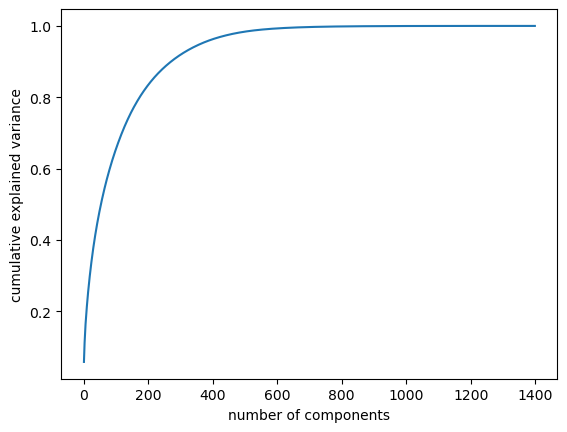

In [196]:
#Choose components satisfy 90-95% of variance
import pylab as plt
import numpy as np 
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [145]:
x_comps = pca_model.transform(x_vecs)
x_comps.shape

(5728, 300)

## 3. Chia dataset thành train set và test set 

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_comps,data0['spam'],test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4582, 300)
(1146, 300)
(4582,)
(1146,)


## 4. Chuẩn hóa miền giá trị sau khi sử dụng Word2vec 

In [147]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
# print(scaler.fit(x_test_transformed))
print(scaler.fit(np.concatenate((x_train,x_test))))

print(scaler.data_max_)
print(scaler.transform(x_train))
print(scaler.transform(x_test))
X_train_W2vec=scaler.transform(x_train)
X_test_W2vec=scaler.transform(x_test)

MinMaxScaler()
[26.74965329 14.75343286 16.14579545 13.71163517 13.18348436 12.94184961
 12.12277883 10.62316688 12.50624698  9.23044256 10.58646466 10.07029002
  9.78974637 10.70709994  9.6142837  10.35061826  9.5138904   9.84288622
  9.46770501  8.22961096  8.46818362  8.3028419   8.64447169  8.24991541
  9.0325908  10.49381713  8.99322671  8.2217966   8.71155636  8.04544384
  8.1876525   7.86142787  9.50234319  7.99966207  7.53777854  7.32219166
  7.35812645  6.56073927  7.45525959  8.55991995  7.02376279  7.43202871
  7.74301356  7.4391051   6.92879348  6.42260999  6.46114681  8.02950551
  7.78954006  6.95721752  7.13421325  6.85513241  7.22172345  7.66983036
  8.05437879  6.73787312  7.73731424  7.4649106   9.3396678   7.48472967
  6.7974797   7.46707708  6.463725    7.10374542  6.16763776  6.32763861
  5.9399141   6.60289662  5.81228409  6.43999874  5.68808342  5.80018657
  6.19971914  5.37700977  5.87227643  5.67114727  5.9388668   6.49588886
  5.5646879   6.12729274  6.26877513

## 5. Huấn luyện mô hình 

## 5.1 SVM 

Đây là bước tinh chỉnh các siêu tham số cho mô hình

In [148]:
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
"""
param_grid_SVM = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}


gs_svm = GridSearchCV(SVC(),param_grid_SVM,cv=5) 
gs_svm.fit(X_train_W2vec,y_train)
"""

"\nparam_grid_SVM = {'C': [0.1, 1, 10, 100, 1000],\n              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],\n              'kernel': ['rbf','linear']}\n\n\ngs_svm = GridSearchCV(SVC(),param_grid_SVM,cv=5) \ngs_svm.fit(X_train_W2vec,y_train)\n"

In [149]:
# gs_svm.best_params_

In [150]:
#gs_svm.best_score_

Sử dụng tham số tối ưu đã tìm được vào mô hình học

In [151]:
from sklearn.svm import SVC
#Create a svm Classifier

clf = svm.SVC(C=10, gamma=0.1,kernel='rbf') 

#Train the model using the training sets
clf.fit(X_train_W2vec,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_W2vec)


In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_pred,y_test)))
print('Precision score: ', format(precision_score(y_pred,y_test)))
print('Recall score: ', format(recall_score(y_pred,y_test)))
print('F1 score: ', format(f1_score(y_pred,y_test))) 

Accuracy score:  0.9284467713787086
Precision score:  0.8379310344827586
Recall score:  0.8741007194244604
F1 score:  0.8556338028169015


In [153]:
print(np.amin(X_train_W2vec))
print(np.amax(X_train_W2vec))

0.0
1.0000000000000002


## 5.2 Naive Bayes

In [154]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_W2vec,y_train)
predictions = naive_bayes.predict(X_test_W2vec)
predictions

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [155]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.7181500872600349
Precision score:  0.6827586206896552
Recall score:  0.46153846153846156
F1 score:  0.5507649513212797


## 5.3 KNN 

Đây là bước tinh chỉnh các siêu tham số cho mô hình

In [156]:
from sklearn.neighbors import KNeighborsClassifier
"""
param_grid = {'n_neighbors': list(range(1,9)),'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan'] }
gs_knn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
gs_knn.fit(X_train_W2vec,y_train)
"""

"\nparam_grid = {'n_neighbors': list(range(1,9)),'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan'] }\ngs_knn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)\ngs_knn.fit(X_train_W2vec,y_train)\n"

In [157]:
# gs_knn.best_score_

In [158]:
# gs_knn.best_params_

Sử dụng tham số tối ưu đã tìm được vào mô hình học

In [159]:
knn = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform',metric = 'minkowski')
knn.fit(X_train_W2vec,y_train) 
y_pred_knn = knn.predict(X_test_W2vec) 

In [160]:
print('Accuracy score: ', format(accuracy_score(y_pred_knn,y_test)))
print('Precision score: ', format(precision_score(y_pred_knn,y_test)))
print('Recall score: ', format(recall_score(y_pred_knn,y_test)))
print('F1 score: ', format(f1_score(y_pred_knn,y_test))) 

Accuracy score:  0.7931937172774869
Precision score:  0.7448275862068966
Recall score:  0.5699208443271768
F1 score:  0.6457399103139013


## 5.4 Random forest 

Đây là bước tinh chỉnh các siêu tham số cho mô hình

In [161]:
from sklearn.ensemble import RandomForestClassifier
"""
param_grid_RF = {'n_estimators': [25, 50, 100, 150],'max_features': ['sqrt', 'log2', None],'max_depth': [3, 6, 9],'max_leaf_nodes': [3, 6, 9],}
gs_rf = GridSearchCV(RandomForestClassifier(),param_grid_RF,cv=5)
gs_rf.fit(X_train_W2vec,y_train)
""" 

"\nparam_grid_RF = {'n_estimators': [25, 50, 100, 150],'max_features': ['sqrt', 'log2', None],'max_depth': [3, 6, 9],'max_leaf_nodes': [3, 6, 9],}\ngs_rf = GridSearchCV(RandomForestClassifier(),param_grid_RF,cv=5)\ngs_rf.fit(X_train_W2vec,y_train)\n"

In [162]:
# gs_rf.best_score_

In [163]:
# gs_rf.best_params_

Sử dụng tham số tối ưu đã tìm được vào mô hình học

In [164]:
rf = RandomForestClassifier(n_estimators=100,max_depth=6,max_leaf_nodes=9,max_features=None,n_jobs=-1)
rf_model = rf.fit(X_train_W2vec,y_train)
y_pred_rf=rf_model.predict(X_test_W2vec)

In [165]:
print('Accuracy score: ', format(accuracy_score(y_pred_rf,y_test))) 
print('Precision score: ', format(precision_score(y_pred_rf,y_test)))
print('Recall score: ', format(recall_score(y_pred_rf,y_test)))
print('F1 score: ', format(f1_score(y_pred_rf,y_test))) 

Accuracy score:  0.8830715532286213
Precision score:  0.6931034482758621
Recall score:  0.8170731707317073
F1 score:  0.75


In [186]:
import matplotlib.pyplot as plt

x_labels = ["SVM", "Naive Bayes", "k-NN", "Random Forest"]
accuracy_scores = [accuracy_score(y_pred,y_test), accuracy_score(predictions,y_test), accuracy_score(y_pred_knn,y_test), accuracy_score(y_pred_rf,y_test)]
precision_scores = [precision_score(y_pred,y_test), precision_score(predictions,y_test), precision_score(y_pred_knn,y_test), precision_score(y_pred_rf,y_test)]
recall_scores = [recall_score(y_pred,y_test), recall_score(predictions,y_test), recall_score(y_pred_knn,y_test), recall_score(y_pred_rf,y_test)]
f1_scores = [f1_score(y_pred,y_test), f1_score(predictions,y_test), f1_score(y_pred_knn,y_test), f1_score(y_pred_rf,y_test)]

(0.0, 1.0)

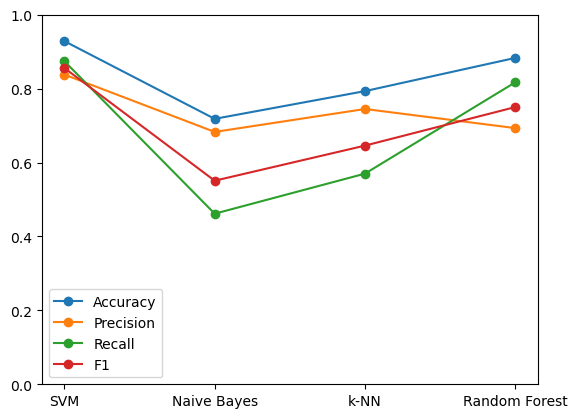

In [187]:
plt.plot(x_labels, accuracy_scores, marker = 'o')
plt.plot(x_labels, precision_scores, marker = 'o')
plt.plot(x_labels, recall_scores, marker = 'o')
plt.plot(x_labels, f1_scores, marker = 'o')
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1'])
plt.ylim([0,1])

(0.0, 1.0)

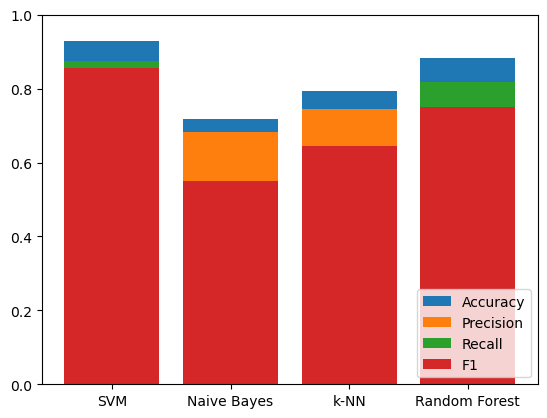

In [194]:
plt.bar(x_labels, accuracy_scores)
plt.bar(x_labels, precision_scores)
plt.bar(x_labels, recall_scores)
plt.bar(x_labels, f1_scores)
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1'], loc=4)
plt.ylim([0,1])